In [1]:
import sys
sys.path.insert(0 , "/home/arpit/study/ML/github")

In [2]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#sometimes there is non linear relation between the features and the target
#in that case the linear model and some times even neural are not able to fit the data well
#In order to fit the model properly we can do some transformation so that then the linear model can fit
#We have already seen the use of the log function
#Some other functions can be exp, sin and cos
#Sin and cos are going to be used when there is some periodicity in the data
#Here we are going to see the variable that is normally distributed
#This is the kind of data you can expect in wild


In [5]:
#This is the way to create the data
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000 , 3))
w = rnd.normal(size = 3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org , w)

In [7]:
print("Shape of x is : \n" , X.shape)

Shape of x is : 
 (1000, 3)


In [9]:
#number of feature appearances
print("Number of feature appearances : \n" , np.bincount(X[: , 0]))
#The value 2 seems to be the most common with 68 appearances
#And the count for higher values fall quickly

Number of feature appearances : 
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0,0.5,'Frequncy')

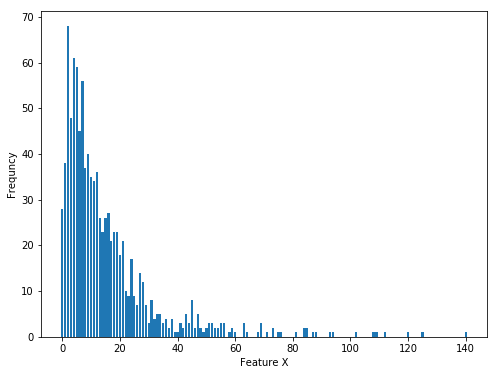

In [14]:
#Now lets make the histogram of this
bins = np.bincount(X[: , 0])
plt.figure(figsize = (8 , 6))
plt.bar(range(len(bins)) , bins)
plt.xlabel("Feature X")
plt.ylabel("Frequncy")
#This is the histogram for the X[0]

Text(0,0.5,'Frequency')

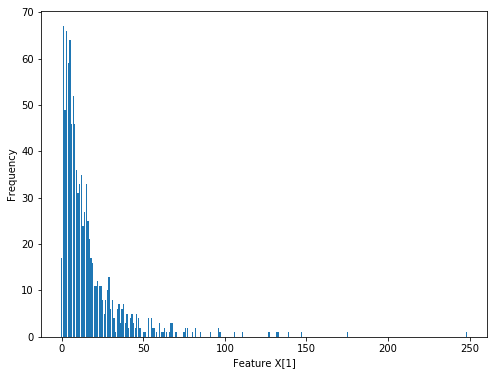

In [16]:
#now ra are going to plot for X[1] and X[2]
plt.figure(figsize = (8 , 6))
bins = np.bincount(X[: , 1])
plt.bar(range(len(bins)) , bins)
plt.xlabel("Feature X[1]")
plt.ylabel("Frequency")

Text(0,0.5,'Frequency')

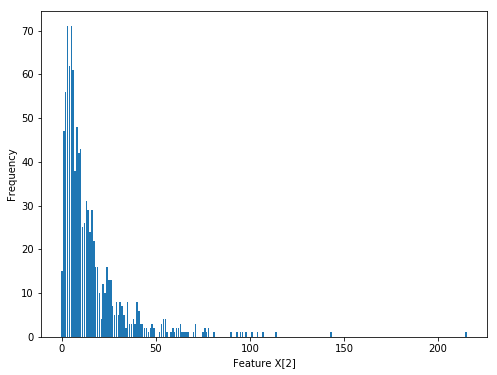

In [17]:
plt.figure(figsize = (8 , 6))
bins = np.bincount(X[: , 2])
plt.bar(range(len(bins)) , bins )
plt.xlabel("Feature X[2]")
plt.ylabel("Frequency")

In [20]:
#This kind of data is very common. This is the kind of gaussian data
#But linear models cannot handle such kind of data
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y)
reg = Ridge().fit(X_train , y_train)

print("Training accuracy : " , reg.score(X_train , y_train))
print("Test accuracy : " , reg.score(X_test, y_test))

#This shows how low the test accuracy 
#Let's try ridge model after some transformation
#We are going to apply the logarithmic function
#But log is not defined for 0 so we apply the transformation of X+1

Training accuracy :  0.6475234463020519
Test accuracy :  0.6513485776383097


In [27]:
X_train_log = np.log(X_train+1)
X_test_log = np.log(X_test + 1)

Text(0,0.5,'Frequency')

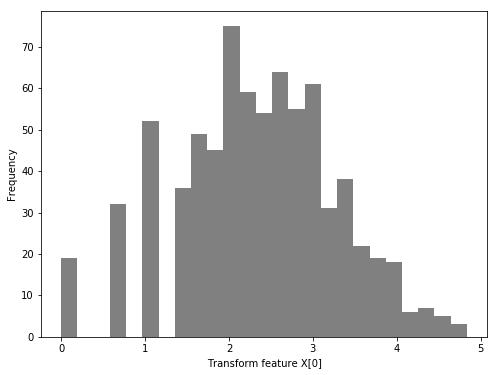

In [36]:
#After the transformation it is good idea to plot the graph
#It is more asymmetrical
plt.figure(figsize = (8, 6))
plt.hist(X_train_log[: , 0] , bins = 25 , color = 'gray')
plt.xlabel("Transform feature X[0]")
plt.ylabel("Frequency")

In [37]:
#now training the ridge model
reg = Ridge().fit(X_train_log , y_train)
print("Train accuracy : " , reg.score(X_train_log , y_train))
print("Test accuracy : " , reg.score(X_test_log , y_test))

#This shows a very good improvement in the performance

Train accuracy :  0.8628461905281744
Test accuracy :  0.8741998601366946


In [ ]:
#in practice only a subset of features need to be transformed
#Each feature need to be transformed in a different way
#This kind of transformation is irrelevant for tree based model
